# Gradient Decent - Code along 

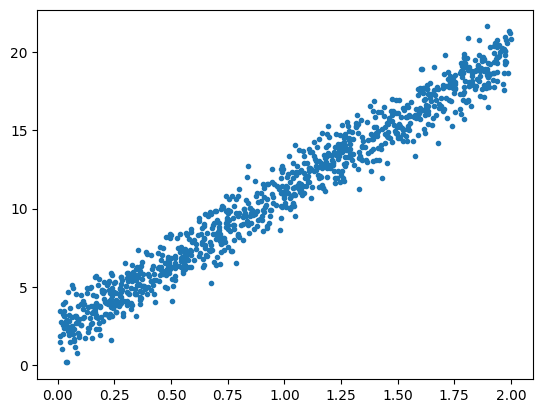

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(42) # Välj inte en seed i verkligheten

samples = 1000

X = 2*np.random.rand(samples, 1)
y = 2+9*X+np.random.randn(samples, 1)

plt.plot(X, y, ".")


In [2]:
X = np.c_[np.ones(samples), X] # Lägger till en ett första kolumnen

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

---

## Computational complexity with Normal equation

The normal equations used in last lecture requires inverting the matrix $X^TX$ which computational complexity reaches $\mathcal{O}(n^3)$ for normal inversion, and $\mathcal{O}(n^2)$ using pseudo-inverse or scikit-learns LinearRegression class.

So if $X$ is $[m,n]$ then $X^TX$ is $[n,m]\times[m,n] = [n,n]$, which means that the computational complexity depends on the number of features. This becomes a problem for large amount of features e.g. 100000. 

---

## Gradient descent

Another way and more general way to train linear regression is by using gradient descent, which is an iterative optimization approach. It works by taking a cost function e.g. MSE, 

$$C = \frac{1}{m}\sum_{i=1}^m (y_i - \hat{y}_i)^2 = \frac{1}{m} \sum_{i=1}^m (y_i - \vec{\theta}\cdot \vec{x}_i)^2$$

Here $\vec{\theta}$ are the parameters that is weights and bias or $\hat{\beta}$ when referred to last lecture.

The main idea with gradient descent is to minimize the cost function (a number representing the error, between label and prediction) through taking small steps one at a time in the direction of the steepest descent. Through multivariate calculus the steepest ascent is the gradient of the multivariate function, so we take the negative diretion of the gradient. 

$$\vec{\theta}_{j+1} = \vec{\theta}_j - \eta\nabla_{\vec{\theta}} C(\vec{\theta})$$

where $\eta$ is the learning rate, $\nabla_{\vec\theta}$ is the gradient w.r.t. $\vec{\theta}$ and $j$ is the iteration step. By adjusting $\eta$ we get different step sizes. With some calculus the gradient becomes:

$$\nabla_{\vec\theta} C(\vec{\theta}) = \ldots = \frac{2}{m}X^T(X\vec{\theta}-\vec{y})$$

Where $m$ is number of datapoints. This is called batch gradient descent as it uses whole training batch, which will be slow on large training set.

In ML Batsch means sample(Stickprov). Sample is just one datapoint in ML

What makes Gradient so powerfull is that you can use any cost function aslong it gives a numeric value. Which means it has alot of flexabilty to be used in many diffrent scenarios. 

In [3]:
def gradient_decent(X, y, learningrate=.1, iterations=100):
    
    """
    Måsta ha en learning rate. Vi måste ha ett start värde, här tar vi ett slumpmässigt värde
    Detta ger en enorm skillnad på vilket start värde du ger modellen. För det ger så olika resultat. 
    I neaural nätverk kan vi bara använda stocastic gradient decent
    """

    m = len(X)
    theta = np.random.randn(X.shape[1], 1)

    for i in range(iterations):
        gradient = (2/m) * X.T @ (X @ theta - y)
        theta -= learningrate*gradient

    return theta

theta = gradient_decent(X_train, y_train)
theta

    

array([[2.30053512],
       [8.82081873]])

In [4]:
steps = range(1, 200, 1)
thetas =[gradient_decent(X, y, iterations=iteration).reshape(-1) for iteration in steps]  
thetas = np.array(thetas)

thetas

array([[0.83187749, 3.60786488],
       [3.88901242, 3.47843209],
       [4.12668523, 5.04705826],
       [4.04441487, 6.34175611],
       [3.52263797, 7.01907053],
       [4.24870253, 6.78738369],
       [4.97419721, 6.29615735],
       [4.70659208, 6.61671291],
       [4.95783199, 6.47201988],
       [5.25634518, 6.24570559],
       [4.61065476, 6.80627623],
       [4.13359576, 7.22589628],
       [4.18011844, 7.19588973],
       [3.3188307 , 7.9370315 ],
       [3.90049152, 7.44014879],
       [4.34492424, 7.06040216],
       [4.16045837, 7.21881916],
       [3.443617  , 7.83389528],
       [4.0799019 , 7.28849377],
       [3.7680737 , 7.5560554 ],
       [3.87217185, 7.46683854],
       [3.66459638, 7.64490013],
       [3.0447943 , 8.17645974],
       [3.59664585, 7.70320414],
       [3.71132507, 7.60486317],
       [3.71181299, 7.60444843],
       [3.27081762, 7.98264629],
       [3.16269871, 8.07536989],
       [3.44300765, 7.83497868],
       [3.69530374, 7.61861069],
       [3.

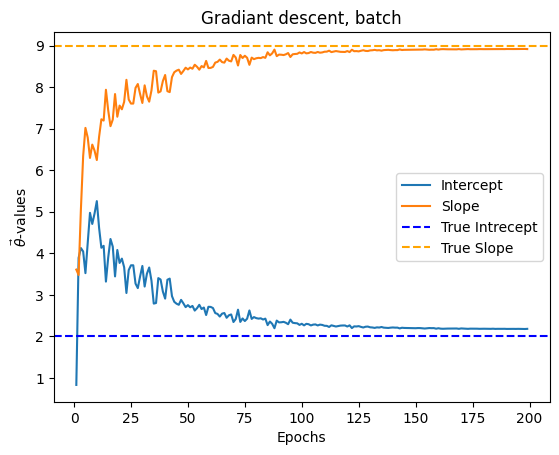

In [5]:
fig, ax = plt.figure(dpi=100), plt.axes()
ax.plot(steps, thetas, label = ["Intercept", "Slope"])
ax.axhline(y=2, color="b", linestyle="--", label="True Intrecept")
ax.axhline(y=9, color="orange", linestyle = "--", label="True Slope")
ax.set(xlabel="Epochs", ylabel=r"$\vec{\theta}$-values", title="Gradiant descent, batch")
ax.legend()

In [ ]:
"""
Stocastic gradient decent
Över tid hos en slumpmässig rörelse, så kommer den täcka hela ytan. Alltså om tiden går mot oändligheten så kommer den befunnits på alla punkter.
Så tillslut kommer den hoppa ur ett loklat minimum

Stocastic gradient decent
Ska vara bra att göra. Är bara att valet av stickprovet(bacth) är random.
"""

epochs = 10
t0, t1 = 5, 50

def learning_rate_scheduel(t):
    return t0/(t+t1)

theta = np.random.randn(2, 1)

m = len(X_train)

for epoch in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        x_i = X_train[random_index:random_index+1]
        y_i = y_train[random_index:random_index+1]
        gradients = 2*x_i.T.dot(x_i.dot(theta)-y_i)
        eta = learning_rate_scheduel(epoch*m+i)
        theta -= eta*gradients



[[-0.62987814]
 [ 0.85499696]]


In [51]:
y_pred = X_test@theta

MAE = np.mean(np.absolute(y_test - y_pred))
MSE = np.mean(np.square(y_test - y_pred))
RMSE = np.sqrt(MSE)


print (f" MAE  {MAE}\n MSE  {MSE}\n RMSE {RMSE}\n")

 MAE  0.7705651465296586
 MSE  0.9503035900587341
 RMSE 0.9748351604546966

